### 과제 1
* 앙상블 모델 중 "부스팅", "스태킹"에 대해 알아보고 자세히 설명할 수 있는 예제를 만들어보자.

* 앙상블: 9.랜덤 포레스트

| 기한 : 24년 1월 5일

### 과제 2
아래 사이트에서 데이터를 수집하여 원하는 프로젝트를 선정하고 데이터를 분석

* 캐글(https://www.kaggle.com/)
* 데이콘(https://dacon.io/)
* AI허브(https://www.aihub.or.kr/)

| 기한 : 24년 1월 5일

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
car_df = pd.read_csv('/content/drive/MyDrive/KDT 시즌2/과제/data/car_price_prediction.csv')
car_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
car_df.isnull()
car_df.dropna(inplace=True)

In [ ]:
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


* ID : 차 ID
* Price : 가격
* Levy : 자동차세
* Manufacturer : 제조사
* Model :  차명
* Prod. year : 생산년도
* Category  : 차종
* Fuel type : 연료타입
* Engine volumne : 마력
* Mileage(연비): 연비
* Cylinders : 실린더 개수
* Gear box type : 기어타입 'Automatic': 0, 'Tiptronic': 1, 'Variator': 2, 'Manual': 3
* Drive wheels : 구동타입
* Doors : 문 개수
* Wheel : 핸들타입
* Color: 색상
* Airbags : 에어백 개수

In [ ]:
# Mileage의 km를 제거
for i in ['Mileage']:
    car_df[i] = pd.to_numeric(car_df[i].str.replace(' km', ''))
car_df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

<Axes: ylabel='Price'>

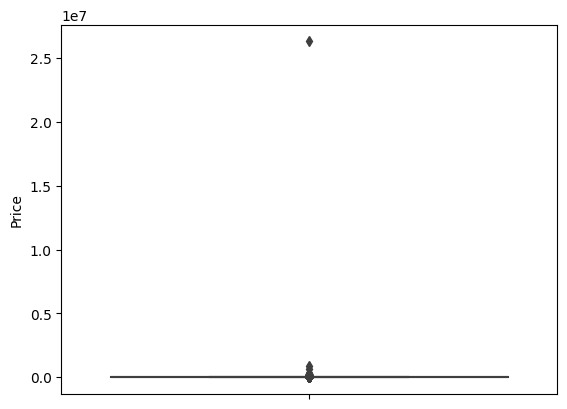

In [ ]:
sns.boxplot(y=car_df['Price'])

In [ ]:
car_df['Price'].sort_values().tail(20)

2912       172486
2768       172486
9248       172486
6468       172486
4722       175622
13328      193184
1145       194438
7353       216391
2283       219527
7283       228935
15283      250574
5840       254024
10759      260296
7749       288521
9367       297930
14839      297930
5008       308906
1225       627220
8541       872946
16983    26307500
Name: Price, dtype: int64

In [ ]:
car_df.iloc[16983]
# OPEL Combo

ID                     45812886
Price                  26307500
Levy                          -
Manufacturer               OPEL
Model                     Combo
Prod. year                 1999
Category            Goods wagon
Leather interior             No
Fuel type                Diesel
Engine volume               1.7
Mileage                   99999
Cylinders                   4.0
Gear box type            Manual
Drive wheels              Front
Doors                    02-Mar
Wheel                Left wheel
Color                      Blue
Airbags                       0
Name: 16983, dtype: object

In [ ]:
car_df.iloc[8541]['Manufacturer']
# Lamborghini Urus

'LAMBORGHINI'

In [ ]:
car_df.iloc[1225]
# G 65 AMG / 63 AMG

ID                        45795524
Price                       627220
Levy                             -
Manufacturer         MERCEDES-BENZ
Model               G 65 AMG 63AMG
Prod. year                    2020
Category                      Jeep
Leather interior               Yes
Fuel type                   Petrol
Engine volume            6.3 Turbo
Mileage                          0
Cylinders                      8.0
Gear box type            Tiptronic
Drive wheels                   4x4
Doors                       04-May
Wheel                   Left wheel
Color                        Black
Airbags                         12
Name: 1225, dtype: object

In [ ]:
car_df = car_df[car_df['Price'] != 26307500]
car_df['Price'].sort_values().tail(20)

7718     167781
2768     172486
6468     172486
9248     172486
2912     172486
4722     175622
13328    193184
1145     194438
7353     216391
2283     219527
7283     228935
15283    250574
5840     254024
10759    260296
7749     288521
14839    297930
9367     297930
5008     308906
1225     627220
8541     872946
Name: Price, dtype: int64

<Axes: ylabel='Price'>

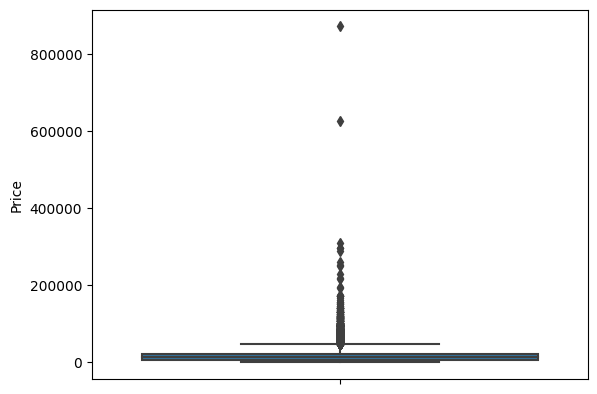

In [ ]:
sns.boxplot(y=car_df['Price'])

In [ ]:
car_df['Drive wheels'].value_counts()

Front    12873
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

In [ ]:
car_df['Drive wheels'] = car_df['Drive wheels'].replace({'Front':400, '4x4':500, 'Rear':600})
car_df['Drive wheels'].value_counts()

<ipython-input-121-e79bdb4c32ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['Drive wheels'] = car_df['Drive wheels'].replace({'Front':400, '4x4':500, 'Rear':600})


400    12873
500     4058
600     2305
Name: Drive wheels, dtype: int64

In [ ]:
car_df['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

In [ ]:
car_df.drop(['ID', 'Levy', 'Cylinders', 'Doors', 'Wheel', 'Color', 'Airbags', 'Model'], axis=1, inplace=True)

<ipython-input-123-21c2c7d6cff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop(['ID', 'Levy', 'Cylinders', 'Doors', 'Wheel', 'Color', 'Airbags', 'Model'], axis=1, inplace=True)


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19236 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19236 non-null  int64 
 1   Manufacturer      19236 non-null  object
 2   Prod. year        19236 non-null  int64 
 3   Category          19236 non-null  object
 4   Leather interior  19236 non-null  object
 5   Fuel type         19236 non-null  object
 6   Engine volume     19236 non-null  object
 7   Mileage           19236 non-null  int64 
 8   Gear box type     19236 non-null  object
 9   Drive wheels      19236 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.6+ MB


In [ ]:
car_df['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [ ]:
car_df['Manufacturer'].unique()
# 'SUBARU', 'OPEL', 'VOLKSWAGEN', 'MITSUBISHI', 'MAZDA', 'GMC', 'FIAT', 'INFINITI', 'ALFA ROMEO', 'SUZUKI', 'ACURA', 'VAZ', 'GAZ', 'CITROEN', 'DODGE', 'CHRYSLER', 'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'სხვა', 'HAVAL', 'HUMMER', 'SCION', 'UAZ', 'MERCURY', 'ZAZ',  'SEAT', 'LANCIA', 'MOSKVICH', 'SAAB', 'PONTIAC', 'SATURN', 'GREATWALL'

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [ ]:
car_df = car_df[~car_df['Manufacturer'].isin(['SUBARU', 'OPEL', 'VOLKSWAGEN', 'MITSUBISHI', 'MAZDA', 'GMC', 'FIAT', 'INFINITI', 'ALFA ROMEO', 'SUZUKI', 'ACURA', 'VAZ', 'GAZ', 'CITROEN', 'DODGE', 'CHRYSLER', 'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'სხვა', 'HAVAL', 'HUMMER', 'SCION', 'UAZ', 'MERCURY', 'ZAZ',  'SEAT', 'LANCIA', 'MOSKVICH', 'SAAB', 'PONTIAC', 'SATURN', 'GREATWALL'])]

In [ ]:
car_df['Manufacturer'].value_counts()
# 31개

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
SSANGYONG         441
KIA               421
AUDI              255
JEEP              138
DAEWOO             91
PORSCHE            54
LAND ROVER         49
MINI               48
JAGUAR             42
RENAULT            37
VOLVO              19
PEUGEOT            17
LINCOLN            15
CADILLAC           14
MASERATI            4
ROVER               3
ROLLS-ROYCE         2
BENTLEY             2
FERRARI             2
TESLA               1
LAMBORGHINI         1
ASTON MARTIN        1
Name: Manufacturer, dtype: int64

In [ ]:
car_df

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,500
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3,192000,Tiptronic,500
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000,Variator,400
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,500
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,400
...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,1999,Coupe,Yes,CNG,2.0 Turbo,300000,Manual,600
19233,15681,HYUNDAI,2011,Sedan,Yes,Petrol,2.4,161600,Tiptronic,400
19234,26108,HYUNDAI,2010,Jeep,Yes,Diesel,2,116365,Automatic,400
19235,5331,CHEVROLET,2007,Jeep,Yes,Diesel,2,51258,Automatic,400


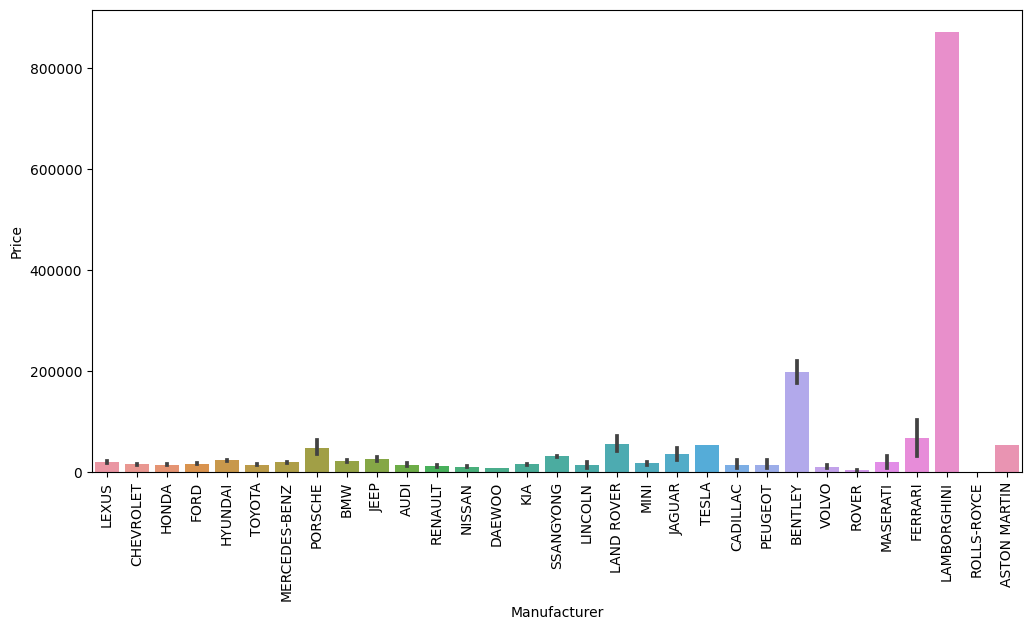

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Price', data=car_df)
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

In [ ]:
car_df = car_df[car_df['Price'] != 872946]
car_df = car_df[car_df['Price'] != 627220]
car_df['Price'].sort_values().tail(20)

4044     156805
13351    163077
7718     167781
2912     172486
2768     172486
6468     172486
9248     172486
4722     175622
13328    193184
1145     194438
7353     216391
2283     219527
7283     228935
15283    250574
5840     254024
10759    260296
7749     288521
9367     297930
14839    297930
5008     308906
Name: Price, dtype: int64

In [ ]:
obj_list = []

for i in car_df.columns:
    if car_df[i].dtype == 'O':
        obj_list.append(i)
for i in obj_list:
    print(i, car_df[i].nunique())

Manufacturer 30
Category 11
Leather interior 2
Fuel type 7
Engine volume 97
Gear box type 4


In [ ]:
car_df['Category'].value_counts()

Sedan          7827
Jeep           4914
Hatchback      2493
Minivan         563
Coupe           462
Microbus        297
Universal       266
Goods wagon     114
Pickup           34
Cabriolet        31
Limousine         9
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Microbus'),
  Text(4, 0, 'Goods wagon'),
  Text(5, 0, 'Universal'),
  Text(6, 0, 'Coupe'),
  Text(7, 0, 'Minivan'),
  Text(8, 0, 'Cabriolet'),
  Text(9, 0, 'Pickup'),
  Text(10, 0, 'Limousine')])

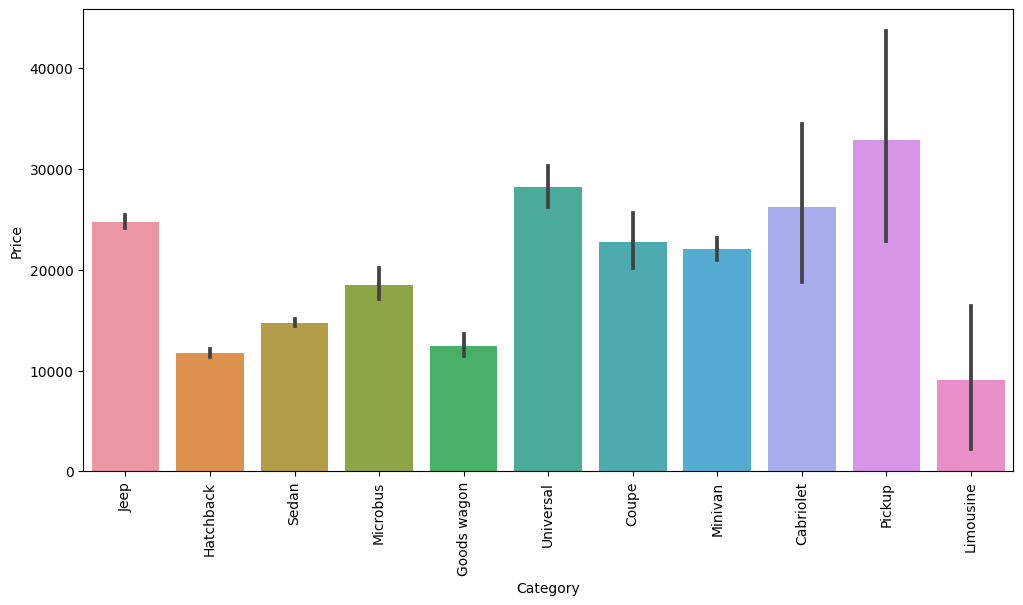

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=car_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Microbus'),
  Text(4, 0, 'Goods wagon'),
  Text(5, 0, 'Universal'),
  Text(6, 0, 'Coupe'),
  Text(7, 0, 'Minivan'),
  Text(8, 0, 'Cabriolet'),
  Text(9, 0, 'Pickup'),
  Text(10, 0, 'Limousine')])

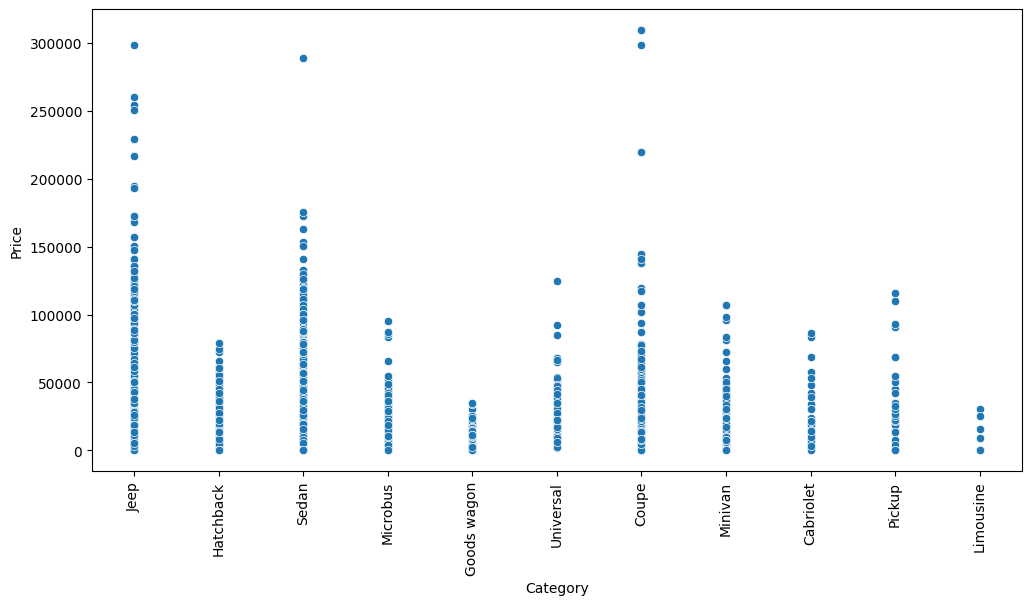

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Category', y='Price', data=car_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Microbus'),
  Text(4, 0, 'Goods wagon'),
  Text(5, 0, 'Universal'),
  Text(6, 0, 'Coupe'),
  Text(7, 0, 'Minivan')])

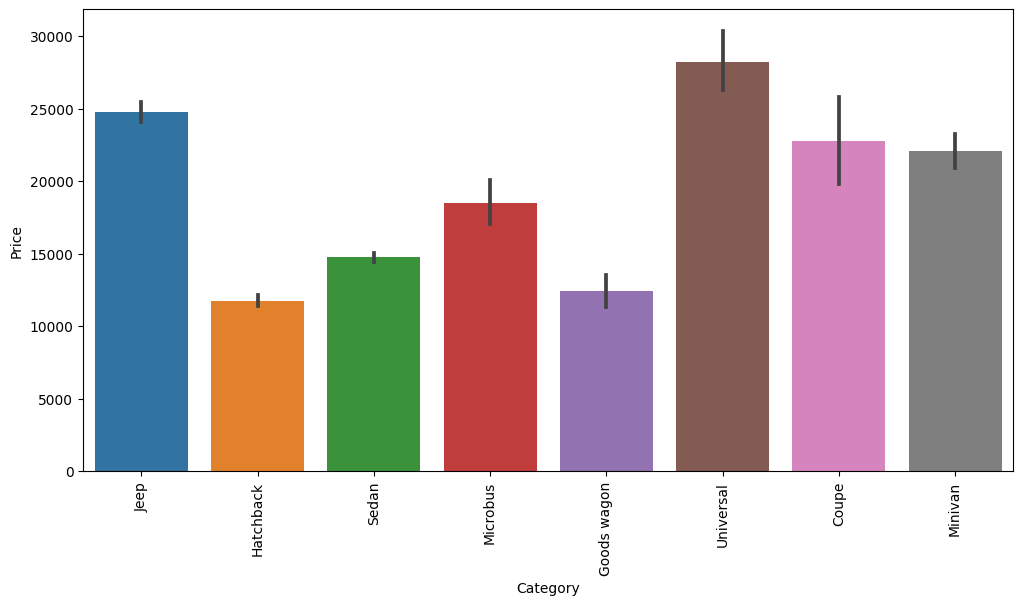

In [ ]:
values_to_remove = ['Limousine', 'Cabriolet', 'Cariolet', 'Pickup']
car_df = car_df[~car_df['Category'].isin(values_to_remove)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=car_df)
plt.xticks(rotation=90)

In [ ]:
car_df['Category'] = car_df['Category'].replace({'Jeep': 1000, 'Hatchback': 2000, 'Sedan': 3000, 'Microbus': 4000, 'Goods wagon': 5000, 'Universal': 6000, 'Coupe': 7000, 'Minivan': 8000})
car_df['Category']

0        1000
1        1000
2        2000
3        1000
4        2000
         ... 
19232    7000
19233    3000
19234    1000
19235    1000
19236    3000
Name: Category, Length: 16936, dtype: int64

In [ ]:
car_df['Manufacturer'].value_counts()

HYUNDAI          3767
TOYOTA           3646
MERCEDES-BENZ    2064
FORD             1102
CHEVROLET        1063
BMW              1037
LEXUS             981
HONDA             976
NISSAN            656
SSANGYONG         439
KIA               421
AUDI              255
JEEP              138
DAEWOO             91
PORSCHE            54
LAND ROVER         49
MINI               47
JAGUAR             40
RENAULT            37
VOLVO              19
PEUGEOT            16
CADILLAC           14
LINCOLN            11
MASERATI            4
ROVER               3
FERRARI             2
BENTLEY             2
TESLA               1
ASTON MARTIN        1
Name: Manufacturer, dtype: int64

<Axes: xlabel='Leather interior', ylabel='Price'>

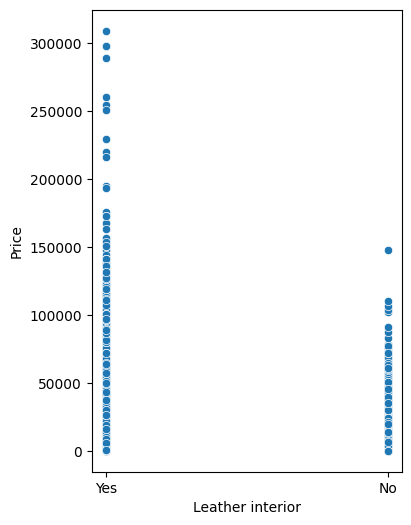

In [ ]:
plt.figure(figsize=(4, 6))
sns.scatterplot(x='Leather interior', y='Price', data=car_df)

In [ ]:
car_df['Leather interior'] = car_df['Leather interior'].replace({'Yes': 777, 'No': 444})
car_df['Leather interior']

0        777
1        444
2        444
3        777
4        777
        ... 
19232    777
19233    777
19234    777
19235    777
19236    777
Name: Leather interior, Length: 16936, dtype: int64

<Axes: xlabel='Fuel type', ylabel='Price'>

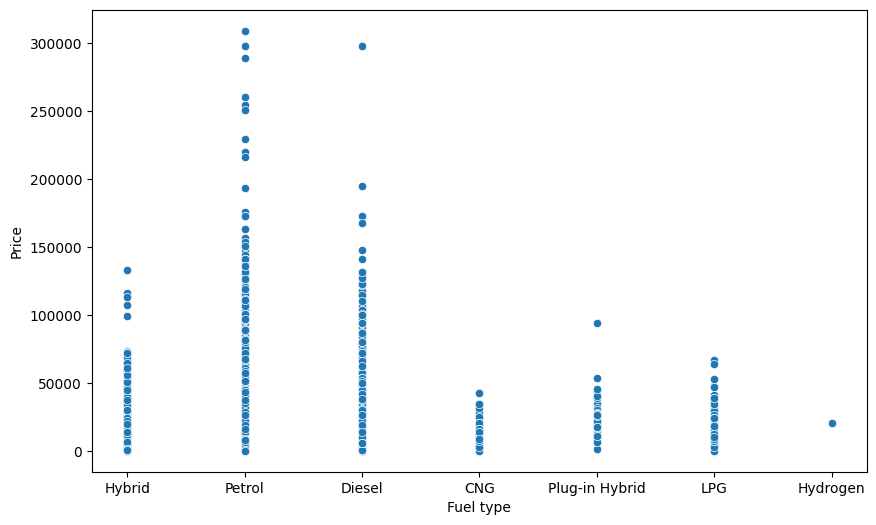

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel type', y='Price', data=car_df)

<Axes: xlabel='Fuel type', ylabel='Price'>

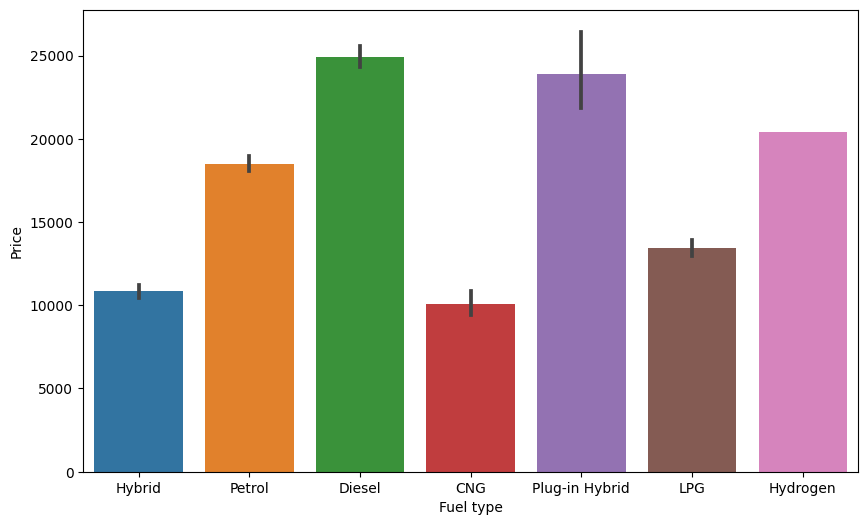

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel type', y='Price', data=car_df)

In [ ]:
car_df['Fuel type'].value_counts()

Petrol            8413
Diesel            3765
Hybrid            3545
LPG                835
CNG                292
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

In [ ]:
car_df['Fuel type'].value_counts()

Petrol            8413
Diesel            3765
Hybrid            3545
LPG                835
CNG                292
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

In [ ]:
car_df['Fuel type'] = car_df['Fuel type'].replace({'Hybrid': 0.01, 'Petrol': 0.02, 'Diesel': 0.03, 'CNG': 0.04, 'Plug-in Hybrid': 0.05, 'Hydrogen': 0.06, 'LPG': 0.07})
car_df['Fuel type']

0        0.01
1        0.02
2        0.02
3        0.01
4        0.02
         ... 
19232    0.04
19233    0.02
19234    0.03
19235    0.03
19236    0.01
Name: Fuel type, Length: 16936, dtype: float64

In [ ]:
car_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '3.3', '1.6',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo', '3.6',
       '2.3', '1.5 Turbo', '1.4 Turbo', '1.6 Turbo', '2.2', '1.4', '5.5',
       '2.8 Turbo', '3.2', '3.8', '4.6', '1.2', '5', '1.7', '2.9', '0.5',
       '1.8 Turbo', '2.4 Turbo', '1.9', '2.7', '4.8', '5.3', '0.4',
       '3.2 Turbo', '2.1', '5.4', '3.7', '2.5 Turbo', '2.6', '4.4 Turbo',
       '4.7 Turbo', '0.8', '1', '3.5 Turbo', '5.7', '2.3 Turbo',
       '4.8 Turbo', '4.6 Turbo', '6.2', '3.4', '2.8', '2.7 Turbo', '4.3',
       '4.2', '2.9 Turbo', '0', '4.0 Turbo', '20', '3.6 Turbo',
       '3.7 Turbo', '5.9', '5.5 Turbo', '6.3 Turbo', '1.7 Turbo',
       '2.1 Turbo', '1.9 Turbo', '0.6 Turbo', '6.8', '6', '4.5', '0.1',
       '4.5 Turbo', '4.2 Turbo', '0.7', '3.1', '5.0 Turbo', '1.2 Turbo',
       '1.1', '5.6', '6.3', '5.7 Turbo', '1.0 Turbo', '3.9', '0.4 Turbo',
       '5.4 Turbo', '5.2', '0.6', '5.8'], dtype=object)

<Axes: xlabel='Engine volume', ylabel='Price'>

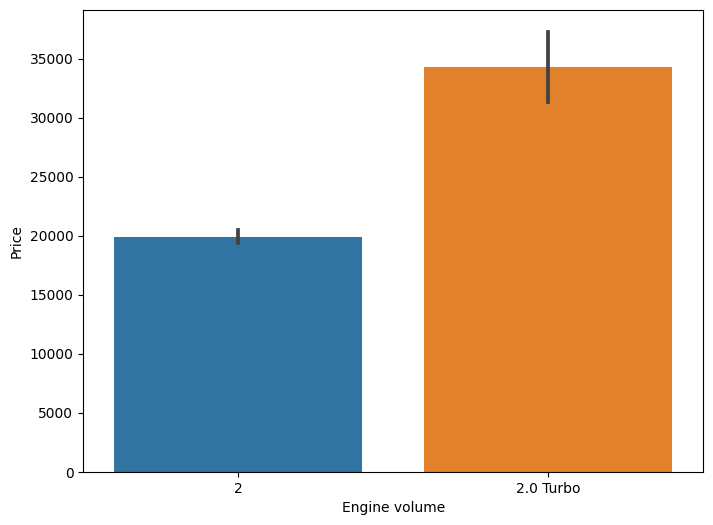

In [ ]:
fuel_type_2_2_turbo = car_df[(car_df['Engine volume'] == '2') | (car_df['Engine volume'] == '2.0 Turbo')]

plt.figure(figsize=(8, 6))
sns.barplot(x='Engine volume', y='Price', data=fuel_type_2_2_turbo)

<Axes: xlabel='Engine volume', ylabel='Price'>

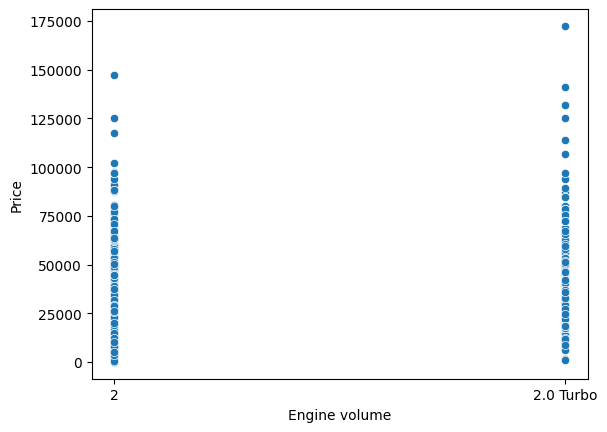

In [ ]:
sns.scatterplot(x='Engine volume', y='Price', data=fuel_type_2_2_turbo)

In [ ]:
car_df

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels
0,13328,LEXUS,2010,1000,777,0.01,3.5,186005,Automatic,500
1,16621,CHEVROLET,2011,1000,444,0.02,3,192000,Tiptronic,500
2,8467,HONDA,2006,2000,444,0.02,1.3,200000,Variator,400
3,3607,FORD,2011,1000,777,0.01,2.5,168966,Automatic,500
4,11726,HONDA,2014,2000,777,0.02,1.3,91901,Automatic,400
...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,1999,7000,777,0.04,2.0 Turbo,300000,Manual,600
19233,15681,HYUNDAI,2011,3000,777,0.02,2.4,161600,Tiptronic,400
19234,26108,HYUNDAI,2010,1000,777,0.03,2,116365,Automatic,400
19235,5331,CHEVROLET,2007,1000,777,0.03,2,51258,Automatic,400


In [ ]:
# Engine volume 열에서 숫자와 Turbo 여부 추출하여 새로운 열에 할당
car_df['Numeric_Engine_volume'] = car_df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)', expand=False)
car_df['Is_Turbo'] = car_df['Engine volume'].str.contains('Turbo').astype(int)

# 숫자열에서 문자열로 변환된 값을 NaN이 아닌 0으로 대체 (숫자가 아닌 문자열을 포함할 경우에만)
car_df['Numeric_Engine_volume'] = car_df['Numeric_Engine_volume'].replace('', np.nan, regex=True).astype(float).fillna(0)

# 필요한 독립 변수 선택
independent_variables = car_df[['Numeric_Engine_volume', 'Is_Turbo']]
print(independent_variables.head())

   Numeric_Engine_volume  Is_Turbo
0                    3.5         0
1                    3.0         0
2                    1.3         0
3                    2.5         0
4                    1.3         0


In [ ]:
car_df.drop(columns=['Engine volume'], inplace=True)

<Axes: xlabel='Gear box type', ylabel='Price'>

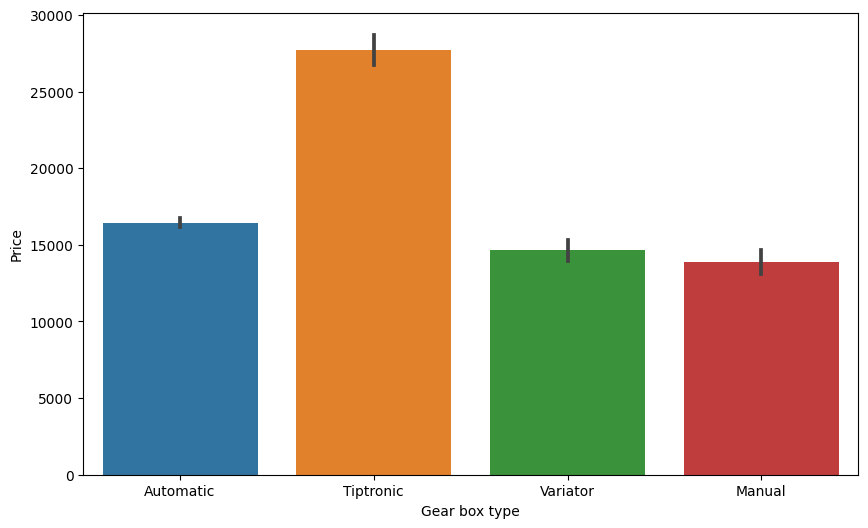

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gear box type', y='Price', data=car_df)

In [ ]:
car_df['Gear box type'] = car_df['Gear box type'].replace({'Automatic': 100, 'Tiptronic': 200, 'Variator': 300, 'Manual': 400})
car_df['Gear box type']

0        100
1        200
2        300
3        100
4        100
        ... 
19232    400
19233    200
19234    100
19235    100
19236    100
Name: Gear box type, Length: 16936, dtype: int64

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 0 to 19236
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  16936 non-null  int64  
 1   Manufacturer           16936 non-null  object 
 2   Prod. year             16936 non-null  int64  
 3   Category               16936 non-null  int64  
 4   Leather interior       16936 non-null  int64  
 5   Fuel type              16936 non-null  float64
 6   Mileage                16936 non-null  int64  
 7   Gear box type          16936 non-null  int64  
 8   Drive wheels           16936 non-null  int64  
 9   Numeric_Engine_volume  16936 non-null  float64
 10  Is_Turbo               16936 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.6+ MB


In [ ]:
car_df = pd.get_dummies(car_df, columns=['Manufacturer'])
car_df.head()

,Price,Prod. year,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Numeric_Engine_volume,Is_Turbo,...,Manufacturer_MINI,Manufacturer_NISSAN,Manufacturer_PEUGEOT,Manufacturer_PORSCHE,Manufacturer_RENAULT,Manufacturer_ROVER,Manufacturer_SSANGYONG,Manufacturer_TESLA,Manufacturer_TOYOTA,Manufacturer_VOLVO
0,13328,2010,1000,777,0.01,186005,100,500,3.5,0,...,0,0,0,0,0,0,0,0,0,0
1,16621,2011,1000,444,0.02,192000,200,500,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,2006,2000,444,0.02,200000,300,400,1.3,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,2011,1000,777,0.01,168966,100,500,2.5,0,...,0,0,0,0,0,0,0,0,0,0
4,11726,2014,2000,777,0.02,91901,100,400,1.3,0,...,0,0,0,0,0,0,0,0,0,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 [Text(0.5, 0, 'Price'),
  Text(1.5, 0, 'Prod. year'),
  Text(2.5, 0, 'Category'),
  Text(3.5, 0, 'Leather interior'),
  Text(4.5, 0, 'Fuel type'),
  Text(5.5, 0, 'Mileage'),
  Text(6.5, 0, 'Gear box type'),
  Text(7.5, 0, 'Drive wheels'),
  Text(8.5, 0, 'Numeric_Engine_volume'),
  Text(9.5, 0, 'Is_Turbo'),
  Text(10.5, 0, 'Manufacturer_ASTON MARTIN'),
  Text(11.5, 0, 'Manufacturer_AUDI'),
  Text(12.5, 0, 'Manufacturer_BENTLEY'),
  Text(13.5, 0, 'Manufacturer_BMW'),
  Text(14.5, 0, 'Manufacturer_CADILLAC'),
  Text(15.5, 0, 'Manufacturer_CHEVROLET'),
  Text(16.5, 0, 'Manufacturer_DAEWOO'),
  Text(17.5, 0, 'Manufacturer_FERRARI'),
  Text(18.5, 0, 'Manufacturer_FORD'),
  Text(19.5, 0, 'Manufacturer_HONDA'),
  Text(20.5, 0, 'M

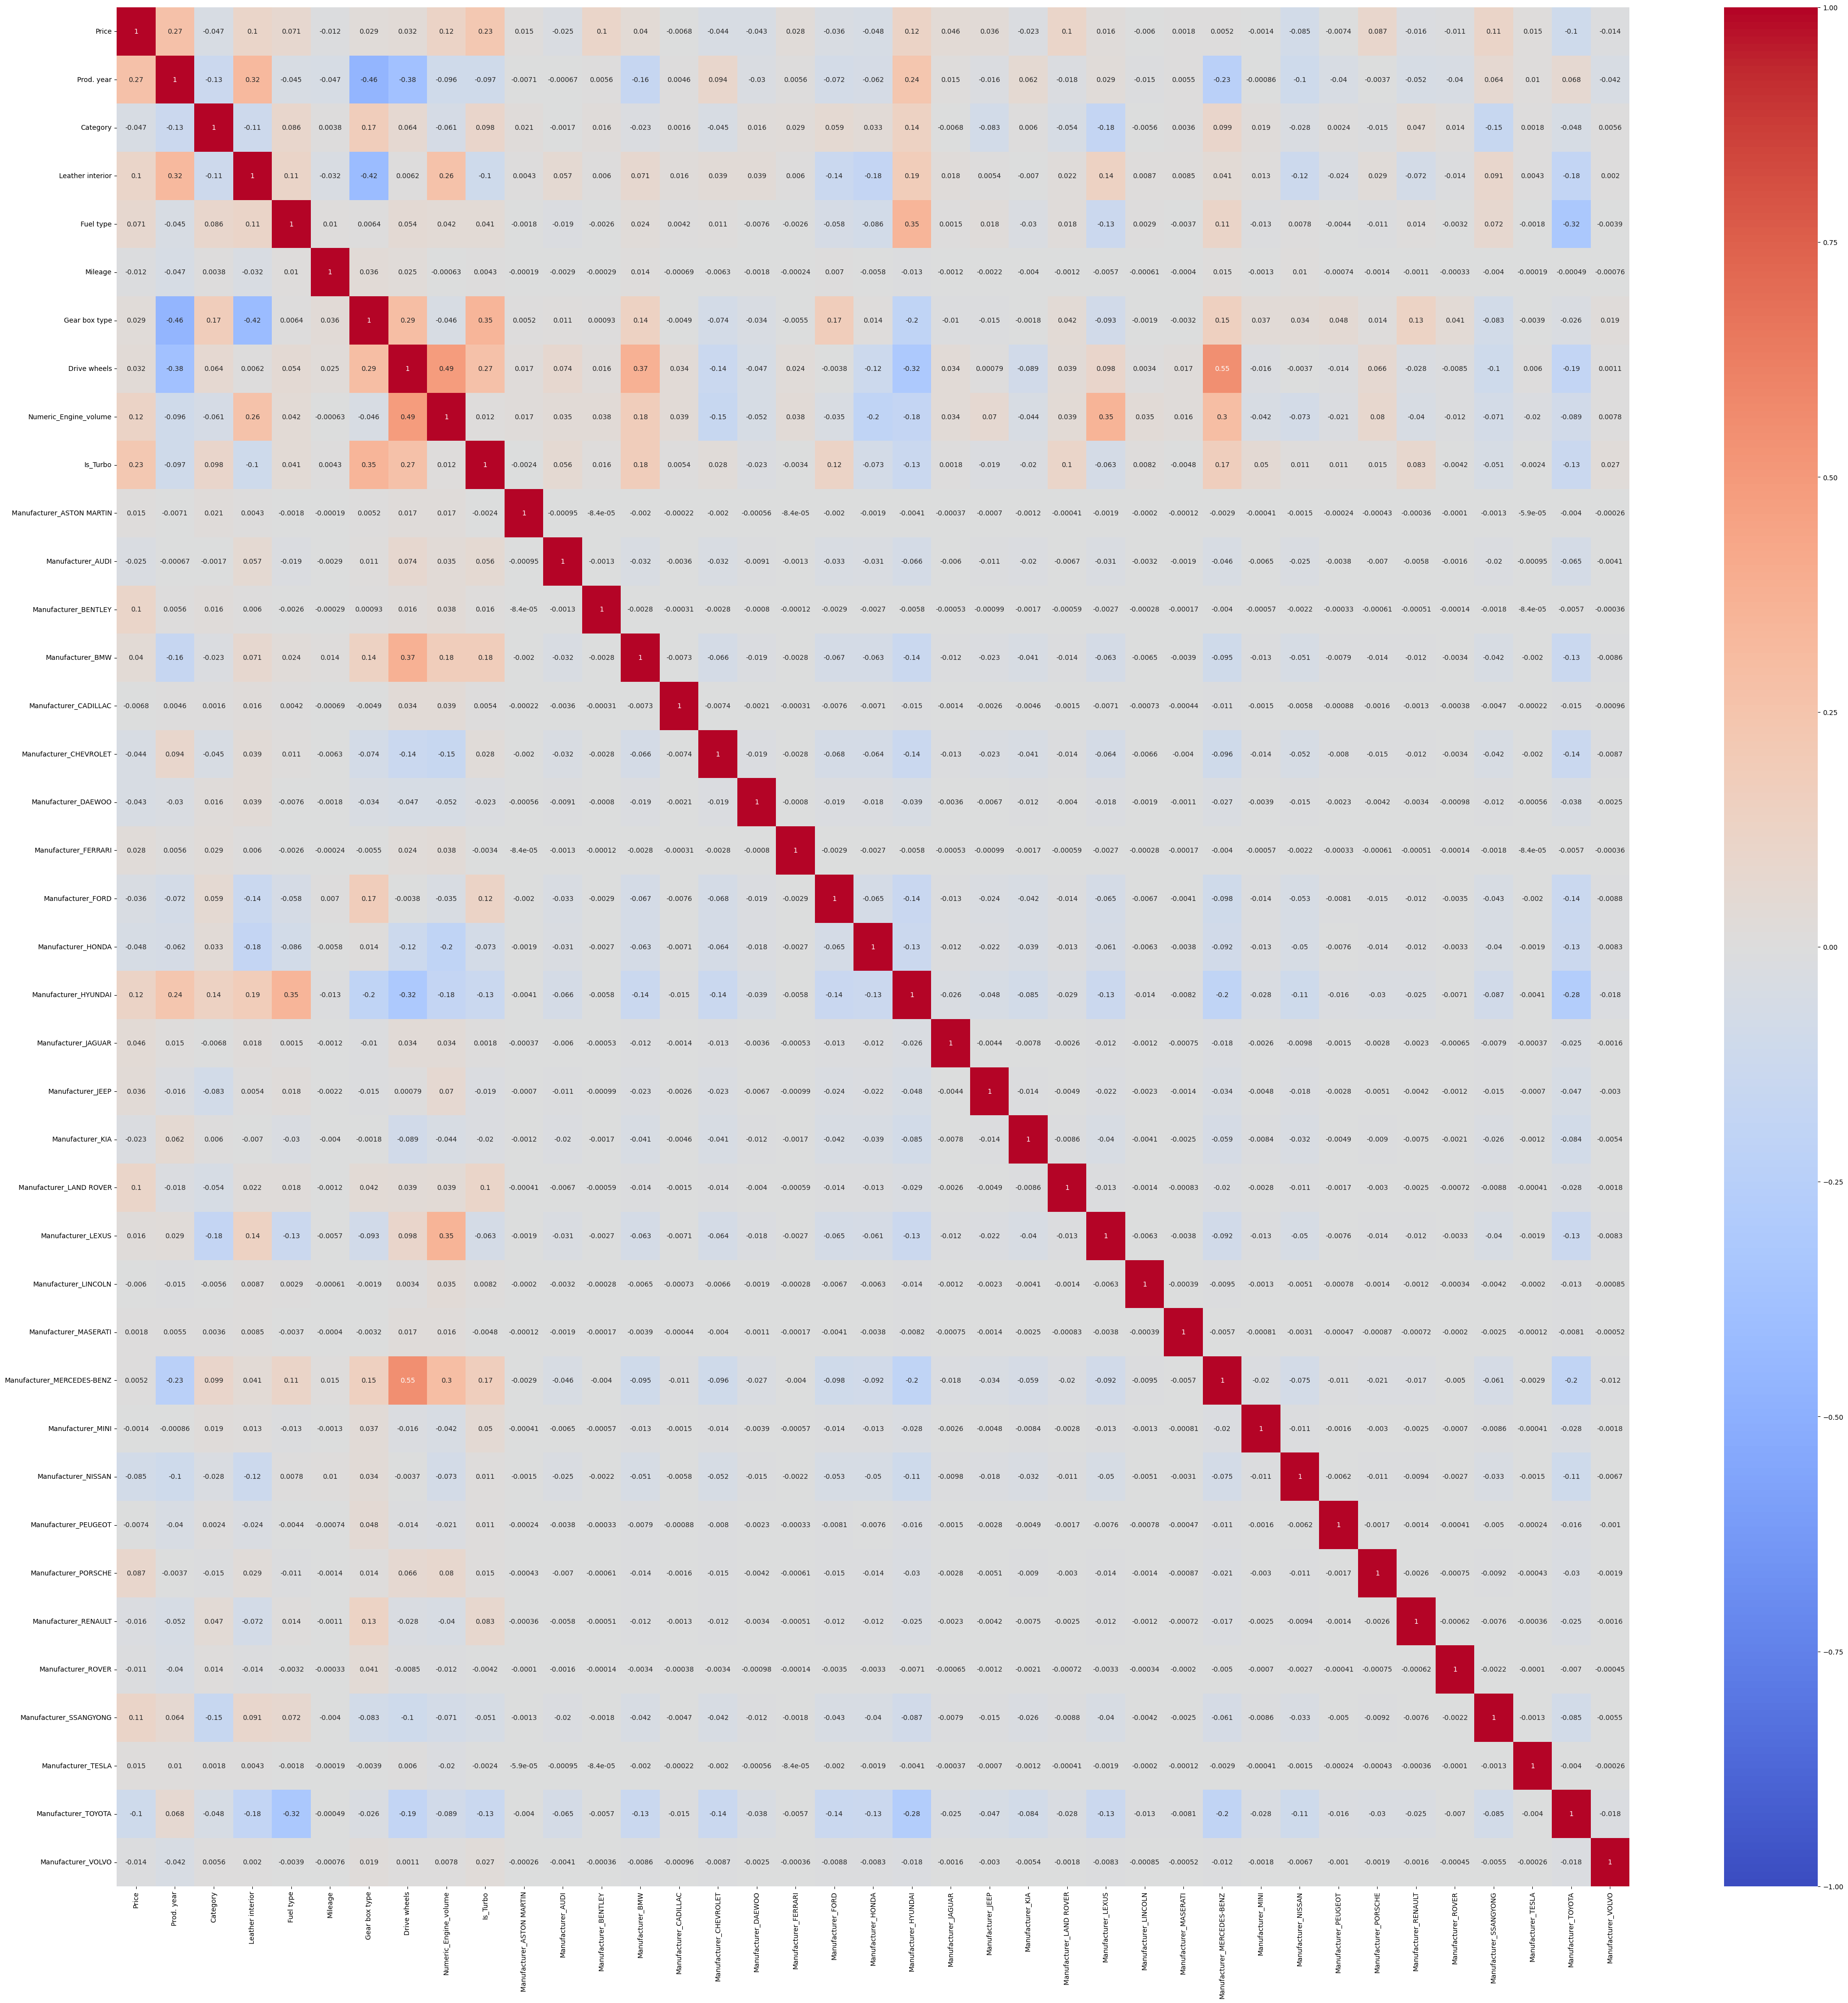

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(car_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.xticks(rotation=90)

In [ ]:
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']
def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)
  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors
  plot_predictions(name_, pred, actual)
  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse
  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  length = len(df)
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  plt.show()

In [ ]:
st_scaler = StandardScaler()
X = car_df.drop('Price', axis=1)
y = car_df['Price']
Xst_scaler = st_scaler.fit_transform(X)
# train: 80%, val:20% 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(Xst_scaler, y, test_size=0.2, random_state=100)

In [ ]:
X_train.shape, y_train.shape

((13548, 38), (13548,))

In [ ]:
X_test.shape, y_test.shape

((3388, 38), (3388,))

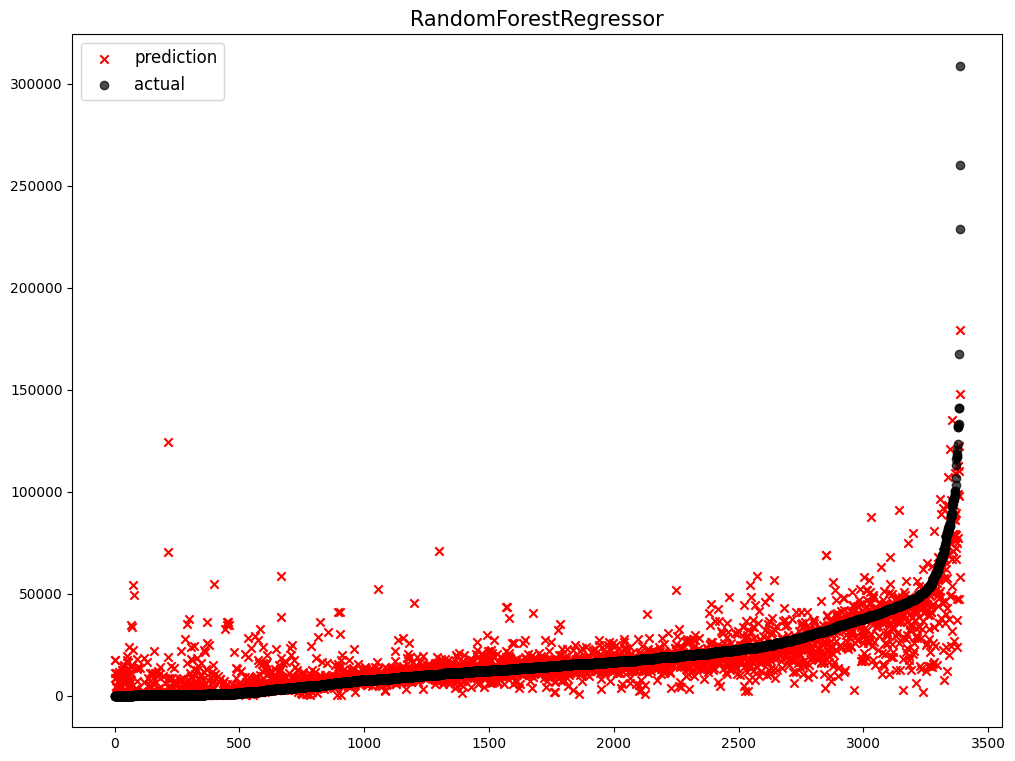

                   model           mse
0  RandomForestRegressor  1.220682e+08


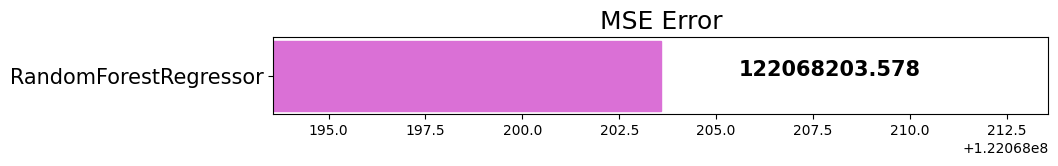

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred
rs = np.sqrt(mean_squared_error(y_test, pred))
rs
mse_eval('RandomForestRegressor', pred, y_test)

In [ ]:
print(rs)

11048.44801672639


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 13548, number of used features: 28
[LightGBM] [Info] Start training from score 17955.201211


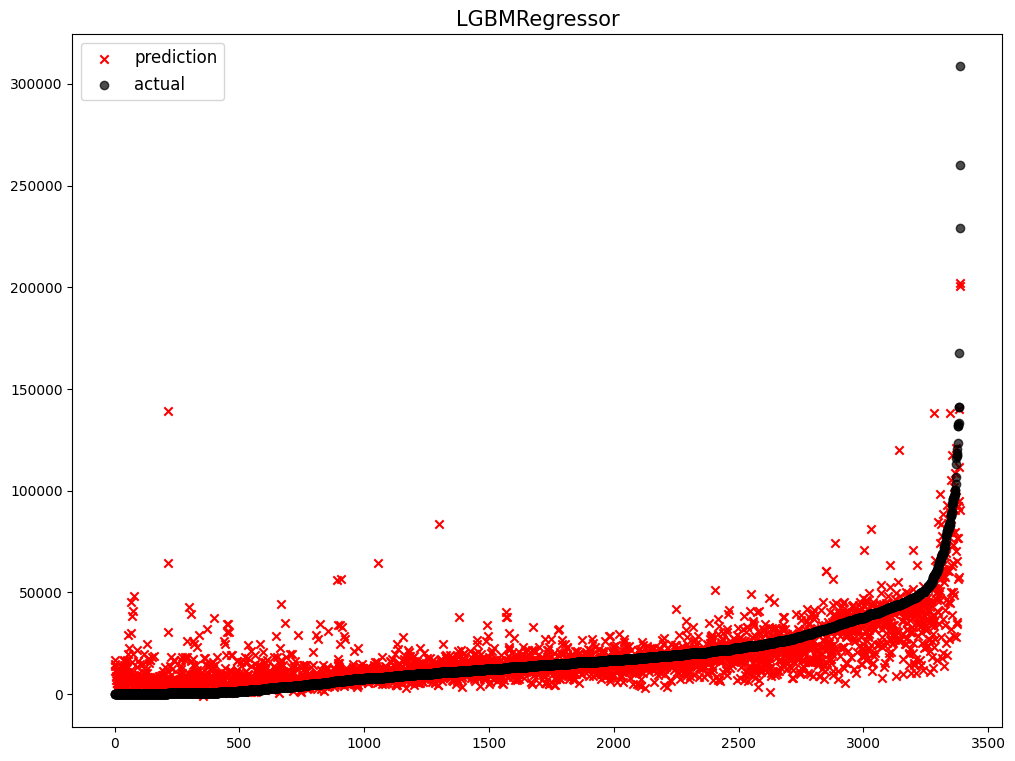

                   model           mse
0          LGBMRegressor  1.327463e+08
1  RandomForestRegressor  1.220682e+08


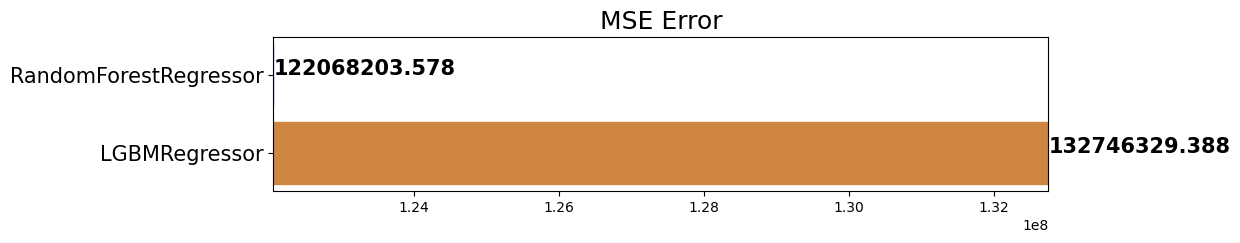

In [ ]:
from lightgbm import LGBMRegressor
model5 = LGBMRegressor(random_state=100)
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
pred5
rs5 = np.sqrt(mean_squared_error(y_test, pred5))
rs5
mse_eval('LGBMRegressor', pred5, y_test)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 0 to 19236
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       16936 non-null  int64  
 1   Prod. year                  16936 non-null  int64  
 2   Category                    16936 non-null  int64  
 3   Leather interior            16936 non-null  int64  
 4   Fuel type                   16936 non-null  float64
 5   Mileage                     16936 non-null  int64  
 6   Gear box type               16936 non-null  int64  
 7   Drive wheels                16936 non-null  int64  
 8   Numeric_Engine_volume       16936 non-null  float64
 9   Is_Turbo                    16936 non-null  int64  
 10  Manufacturer_ASTON MARTIN   16936 non-null  uint8  
 11  Manufacturer_AUDI           16936 non-null  uint8  
 12  Manufacturer_BENTLEY        16936 non-null  uint8  
 13  Manufacturer_BMW            169